In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task.csv')

In [3]:
data

,Experience,Success
0,14,0
1,29,0
2,6,0
3,25,1
4,18,1
5,4,0
6,18,0
7,12,0
8,22,1
9,6,0


In [4]:
experience = data.Experience

In [5]:
experience1 = data.iloc[:,:1]
# adding 1s to conver to dataframe

In [6]:
type(experience1)

pandas.core.frame.DataFrame

In [7]:
experience1["constant"] = 1
experience[:5]

0    14
1    29
2     6
3    25
4    18
Name: Experience, dtype: int64

In [8]:
# reorder cols
experience1 = experience1[['constant','Experience']]
experience1[:5]

,constant,Experience
0,1,14
1,1,29
2,1,6
3,1,25
4,1,18


In [9]:
success = data.Success

In [10]:
n = len(success)
n

25

## Statsmodels GLM

In [11]:
import statsmodels.api as sm

In [12]:
model_glm = sm.GLM(success,experience1,family=sm.families.Binomial()).fit()

In [13]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Success   No. Observations:                   25
Model:                            GLM   Df Residuals:                       23
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.712
Date:                Wed, 02 Oct 2019   Deviance:                       25.425
Time:                        18:30:09   Pearson chi2:                     24.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -3.0597      1.259     -2.430      0.015      -5.528      -0.591
Experience     0.1615      0.065      2.485      0.013       0.034       0.289
==============================================================================
"""

In [14]:
model_glm.params

constant     -3.059696
Experience    0.161486
dtype: float64

In [15]:
data1 = data.copy()

In [16]:
model_glm.fittedvalues[:5]

0    0.310262
1    0.835263
2    0.109996
3    0.726602
4    0.461837
dtype: float64

In [17]:
data1['fittedvalues'] = model_glm.fittedvalues
data1[:5]

,Experience,Success,fittedvalues
0,14,0,0.310262
1,29,0,0.835263
2,6,0,0.109996
3,25,1,0.726602
4,18,1,0.461837


In [18]:
# fittenvalues = estimated probability (πhat)

In [19]:
model_glm.resid_response[:5]

0   -0.310262
1   -0.835263
2   -0.109996
3    0.273398
4    0.538163
dtype: float64

In [20]:
data1['resid_response'] = model_glm.resid_response
data1 [:5]

,Experience,Success,fittedvalues,resid_response
0,14,0,0.310262,-0.310262
1,29,0,0.835263,-0.835263
2,6,0,0.109996,-0.109996
3,25,1,0.726602,0.273398
4,18,1,0.461837,0.538163


In [21]:
model_glm.predict(experience1)[:5]
# still the same πhat

0    0.310262
1    0.835263
2    0.109996
3    0.726602
4    0.461837
dtype: float64

In [22]:
yprob = model_glm.predict(experience1)

In [23]:
# yhat values

In [24]:
yprob[yprob >= 0.5] = 1
yprob[yprob < 0.5] = 0
yprob

0     0.0
1     1.0
2     0.0
3     1.0
4     0.0
5     0.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    0.0
12    1.0
13    0.0
14    1.0
15    0.0
16    0.0
17    1.0
18    1.0
19    0.0
20    1.0
21    0.0
22    1.0
23    1.0
24    0.0
dtype: float64

In [25]:
data1['yhat'] = yprob.astype(int)
data1[:5]

,Experience,Success,fittedvalues,resid_response,yhat
0,14,0,0.310262,-0.310262,0
1,29,0,0.835263,-0.835263,1
2,6,0,0.109996,-0.109996,0
3,25,1,0.726602,0.273398,1
4,18,1,0.461837,0.538163,0


In [26]:
data1[data1.Success != data1.yhat]

,Experience,Success,fittedvalues,resid_response,yhat
1,29,0,0.835263,-0.835263,1
4,18,1,0.461837,0.538163,0
18,24,0,0.693379,-0.693379,1
19,13,1,0.276802,0.723198,0
20,19,0,0.502134,-0.502134,1
24,8,1,0.145815,0.854185,0


In [27]:
# error rate (acuracy rate)
6/n

0.24

In [28]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Success   No. Observations:                   25
Model:                            GLM   Df Residuals:                       23
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.712
Date:                Wed, 02 Oct 2019   Deviance:                       25.425
Time:                        18:30:09   Pearson chi2:                     24.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -3.0597      1.259     -2.430      0.015      -5.528      -0.591
Experience     0.1615      0.065      2.485      0.013       0.034       0.289
==============================================================================
"""

In [29]:
# Deviance:	25.425  == the residual sum of squares (the smaller the better!)

In [30]:
model_glm.null_deviance
# equavalance to the total sum of squares
# won't change if the model changes, decided by the data

34.29649001261865

In [31]:
model_glm.deviance
# same as shown in summary
# will become smaller if model is better

25.424574080450917

In [32]:
model_glm.conf_int(alpha = 0.10)
# 90% CI

,0,1
constant,-5.131142,-0.988250
Experience,0.054603,0.268369


In [33]:
odd_ratio = np.exp(model_glm.params)
odd_ratio

constant      0.046902
Experience    1.175256
dtype: float64

In [34]:
# Experience    1.175256
# the odds increase by 17.5% for every additional month of experience

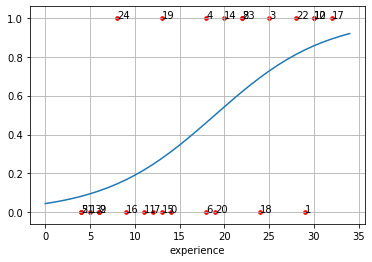

In [38]:
# plot
xaxis = range(35)
yaxis = model_glm.predict(sm.add_constant(xaxis))
plt.scatter(experience, success, s = 13, c = 'r')

plt.plot(xaxis,yaxis)

for i in range(n):
    plt.annotate(i,(experience[i],success[i]))

plt.xlabel('experience')
plt.grid()